<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter2/DSML_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.10


# Example 2.1
## Import modules


In [2]:
import numpy as np
from numpy.random import rand , randn
from numpy.linalg import norm , solve
from scipy.linalg import hilbert # Add Hibert matrix
import matplotlib.pyplot as plt
import scipy
print(scipy.__version__)
print(np.__version__)

1.4.1
1.19.5


## Define data generator

In [3]:
def generate_data(beta , sig, n):
   u = np.random.rand(n, 1)
   y = (u ** np.arange(0, 4)) @ beta + sig * np.random.randn(n, 1)
   return u, y

## Set random seed

In [4]:
np.random.seed(12)
#np.random.seed(1200)

## Reproduce Figure 4.

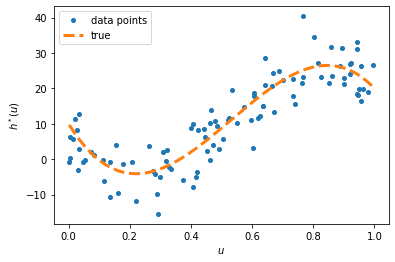

In [5]:
beta = np.array([[10, -140, 400, -250]]).T
n = 100
sig = 5
u, y = generate_data(beta , sig, n)
xx = np.arange(np.min(u), np.max(u)+5e-3, 5e-3)
yy = np.polyval(np.flip(beta), xx)
plt.plot(u, y, '.', markersize=8)
plt.plot(xx, yy, '--',linewidth=3)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^*(u)$')
plt.legend(['data points','true'])
plt.savefig('polydatpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Reproduce Figure 2.6

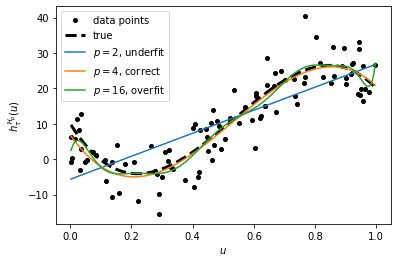

In [6]:
max_p = 16 # More than 16 may get singular matrix
p_range = np.arange(1, max_p + 1, 1)
X = np.ones((n, 1))
#betahat, trainloss = {}, {}
betahat = {}
trainloss = []
for p in p_range:  # p is the number of parameters
    if p > 1:
        X = np.hstack((X, u**(p-1)))  # add column to matrix

    betahat[p] = solve(X.T @ X, X.T @ y)
    #trainloss[p] = (norm(y - X @ betahat[p])**2/n)
    trainloss.append((norm(y - X @ betahat[p])**2/n))

p = [2, 4, 16]  # select three curves

#replot the points and true line and store in the list "plots"
plots = [plt.plot(u, y, 'k.', markersize=8)[0], 
         plt.plot(xx, yy, 'k--',linewidth=3)[0]]
# add the three curves
for i in p:
    yy = np.polyval(np.flip(betahat[i]), xx)
    plots.append(plt.plot(xx, yy)[0])

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.xlabel(r'$u$')
plt.ylabel(r'$h^{\mathcal{H}_p}_{\tau}(u)$')
plt.legend(plots,('data points', 'true','$p=2$, underfit',
                  '$p=4$, correct','$p=16$, overfit','d'))
plt.savefig('polyfitpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Reproduce Training loss

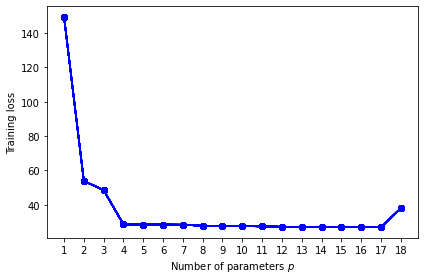

In [7]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for p in p_range:  # p is the number of parameters
  plt.plot(p_range, trainloss, 'b', p_range, trainloss, 'bo-')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Training loss')
plt.tight_layout()
plt.savefig('MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Reproduce Figure 2.7

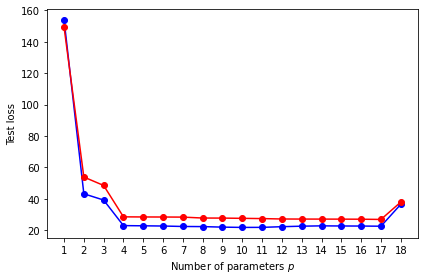

In [8]:
# generate test data
u_test, y_test = generate_data(beta, sig, n)

MSE = []
X_test = np.ones((n, 1))

for p in p_range:
    if p > 1:
        X_test = np.hstack((X_test, u_test**(p-1)))

    y_hat = X_test @ betahat[p]  # predictions
    MSE.append(np.sum((y_test - y_hat)**2/n))

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(p_range, MSE, 'bo-', label = 'test loss')
plt.plot(p_range, trainloss, 'ro-')
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Approximation error of Example 2.2, reproduce Equation 2.19


In [9]:
aproxloss = []
irredu_loss = []
beta_B = {}
H = hilbert(4)
H7 = hilbert(7)
h_l = H7[0:7, 0]
print(h_l)
for p in p_range:
  irredu_loss.append(sig*sig)
  if p >= 1 and p <= 3 :
    hb = H[0:p, :].dot(beta)
    beta_best = solve(hilbert(p), hb)
    kk = p
    beta_long=np.pad(beta_best,((0,4-p),(0,0)),'constant', constant_values=(0,0))
    beta_diff = (beta_long-beta).reshape(4,)
    risk_app = np.dot(np.polymul(beta_diff,beta_diff),h_l)
    aproxloss.append(risk_app)
    beta_B[p] = beta_best  #np.pad(beta_best,((0,p-1),(0,0)),'constant', constant_values=(0,0))
  else :
    aproxloss.append(0)
    beta_B[p] = np.pad(beta,((0,p-4),(0,0)),'constant', constant_values=(0,0))
print(aproxloss)

[1.         0.5        0.33333333 0.25       0.2        0.16666667
 0.14285714]
[127.87698412698228, 25.79365079366835, 22.321428571442084, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Reproduce statistical error of Example 2.2

In [10]:
stat_loss = []
beta_diff = {}

for p in p_range:
  beta_diff[p] = betahat[p] - beta_B[p]
  sloss = hilbert(p)@beta_diff[p]
  ss = beta_diff[p].T @ sloss
  stat_loss.append(ss[0][0])


## Reproduce Figure 2.8

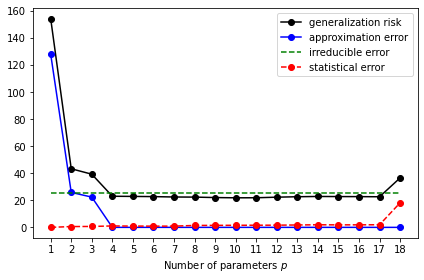

In [11]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
line1 = plt.plot(p_range, MSE, 'ko-', label = 'generalization risk')
line2 = plt.plot(p_range, aproxloss, 'bo-', label = 'approximation error')
line3 = plt.plot(p_range, irredu_loss, 'g--', label = 'irreducible error')
line4 = plt.plot(p_range, stat_loss, 'ro--', label = 'statistical error')
plt.legend()
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.tight_layout()
plt.savefig('MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Reproduce Figure 2.9

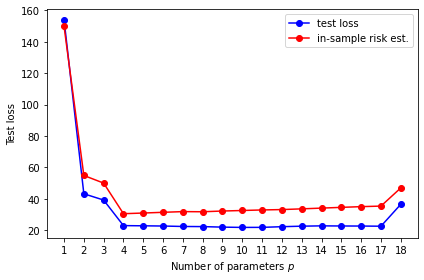

In [12]:
inSampleRisk = []
for p in p_range:
  inSampleRisk.append(2*sig*sig*p/n+trainloss[p-1])

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
line1 = plt.plot(p_range, MSE, 'bo-', label = 'test loss')
line2 = plt.plot(p_range, inSampleRisk, 'ro-', label = 'in-sample risk est.')
plt.legend()
plt.xticks(ticks=p_range)
plt.xlabel('Number of parameters $p$')
plt.ylabel('Test loss')
plt.tight_layout()
plt.savefig('MSEpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## CV

In [13]:
K_vals = [5, 10, 100]  # number of folds
cv = np.zeros((len(K_vals), max_p))
X = np.ones((n, 1))
for p in p_range:
    if p > 1:
        X = np.hstack((X, u**(p-1)))
    j = 0
    for K in K_vals:
        loss = []
        for k in range(1, K+1):
            # integer indices of test samples
            test_ind = ((n/K)*(k-1) + np.arange(1, n/K + 1) - 1).astype('int')
            train_ind = np.setdiff1d(np.arange(n), test_ind)

            X_train, y_train = X[train_ind, :], y[train_ind, :]
            X_test, y_test = X[test_ind, :], y[test_ind]

            # fit model and evaluate test loss
            betahat = solve(X_train.T @ X_train, X_train.T @ y_train)
            loss.append(norm(y_test - X_test @ betahat) ** 2)

        cv[j, p-1] = sum(loss) / n
        j += 1

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
p1 = plt.plot(p_range, cv[0, :], 'k-.', p_range, cv[0, :], 'k.', markersize=10)[0]
p2 = plt.plot(p_range, cv[1, :], 'r', p_range, cv[1, :], 'r.', markersize=10)[0]
p3 = plt.plot(p_range, cv[2, :], 'b--', p_range, cv[2, :], 'b.', markersize=10)[0]
plt.xticks(range(2, 19, 2))
plt.xlabel('Number of parameters $p$')
plt.ylabel('$K$-fold cross-validation loss')
plt.legend((p1,p2,p3),('$K$=5','$K$=10','$K$=100'))
plt.tight_layout()
plt.savefig('crossvalpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

LinAlgError: ignored